# Titanic Survival Prediction

## Loading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing our datasets
Train_data= pd.read_csv("train.csv")

In [3]:
Test_data=pd.read_csv("test.csv")

In [4]:
Train_data.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
Test_data.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

Train_data.info()

In [7]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [8]:
Train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
Test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
from collections import Counter

In [11]:
def detect_outliers(Train_data,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(Train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(Train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        #outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = Train_data[(Train_data[col] < Q1 - outlier_step) | (Train_data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(Train_data,2,["Age","SibSp","Parch","Fare"])

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [12]:
Train_data.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [13]:
Train_data=Train_data.drop(Outliers_to_drop, axis=0).reset_index(drop=True)

In [14]:
Train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [15]:
Test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
Train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
Test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
missing_value=Train_data.isnull().sum()
missing_value[missing_value>0]


Age         170
Cabin       680
Embarked      2
dtype: int64

In [19]:
missing_value1=Test_data.isnull().sum()
missing_value1[missing_value1>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [20]:
avg_age=Train_data["Age"].mean(axis=0)
print("The Average of Age is:",avg_age)
Train_data["Age"].fillna(avg_age,inplace=True)

The Average of Age is: 29.731603375527424


In [21]:
avg_age1=Test_data["Age"].mean(axis=0)
print("The Average of Age is:",avg_age1)
Test_data["Age"].fillna(avg_age1,inplace=True)

The Average of Age is: 30.272590361445783


In [22]:
Train_data.Cabin.value_counts()

B96 B98    4
G6         4
D          3
E101       3
F33        3
          ..
C32        1
B71        1
E46        1
C54        1
C30        1
Name: Cabin, Length: 147, dtype: int64

In [23]:
Test_data.Cabin.value_counts()

B57 B59 B63 B66    3
C31                2
F4                 2
A34                2
C116               2
                  ..
D                  1
B78                1
D15                1
C132               1
B51 B53 B55        1
Name: Cabin, Length: 76, dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
Train_data["Cabin"].fillna("Unknown",inplace=True)

In [26]:
Test_data["Cabin"].fillna("Unknown",inplace=True)

In [27]:
Train_data.Embarked.value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


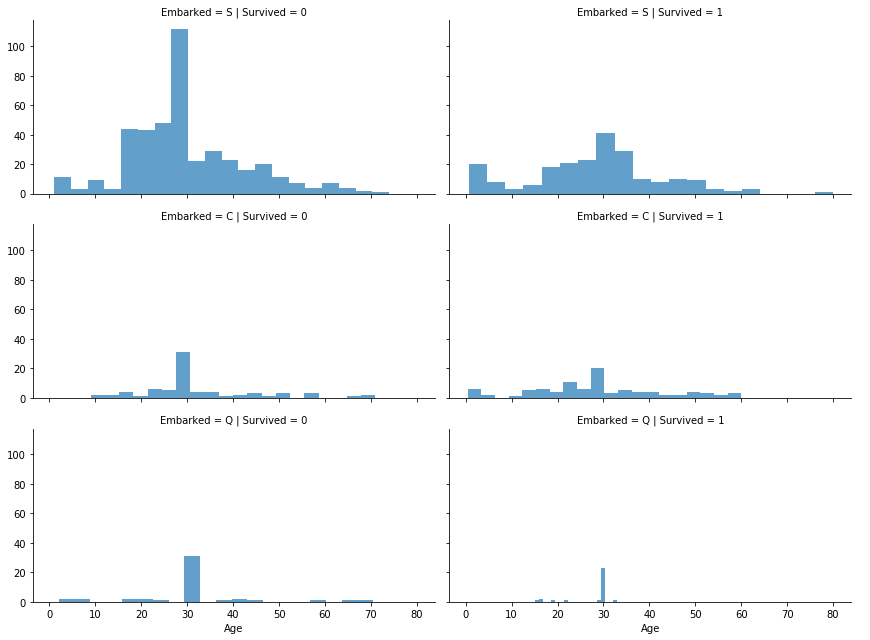

In [28]:
grid= sns.FacetGrid(Train_data,row="Embarked",col= "Survived",size=3,aspect =2)
grid.map(plt.hist,"Age",alpha = 0.7, bins=20)
grid.add_legend()

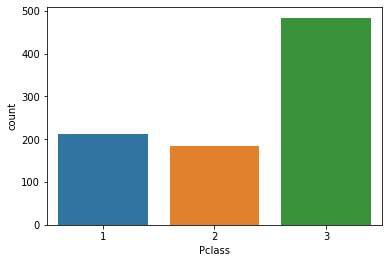

In [29]:
sns.countplot(Train_data["Pclass"])
plt.show()

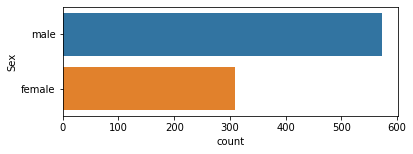

In [30]:
plt.figure(figsize=(6,2))
sns.countplot(y="Sex",data=Train_data);
           

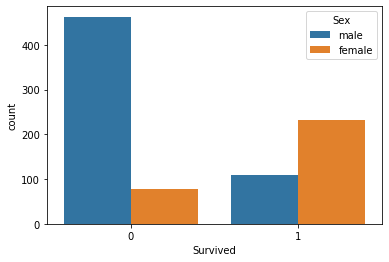

In [31]:
sns.countplot(x="Survived",hue="Sex",data=Train_data)

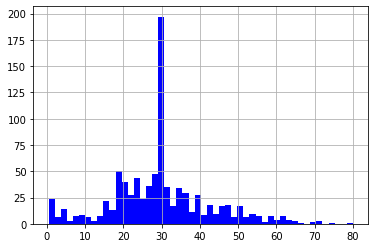

In [32]:
Train_data["Age"].hist(bins=50,color="blue")
plt.show()

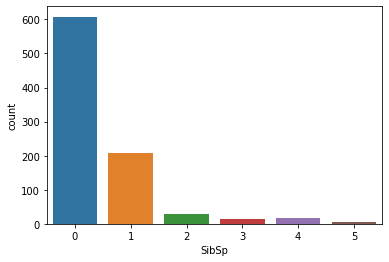

In [33]:
sns.countplot(Train_data["SibSp"])
plt.show()

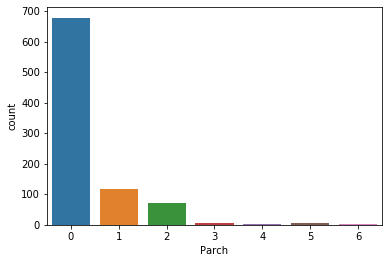

In [34]:
sns.countplot(Train_data["Parch"])
plt.show()

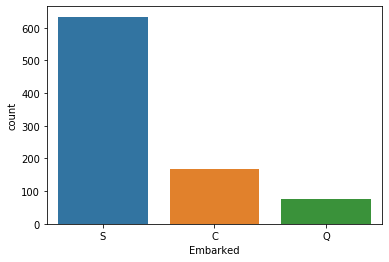

In [35]:
sns.countplot(Train_data["Embarked"])
plt.show()

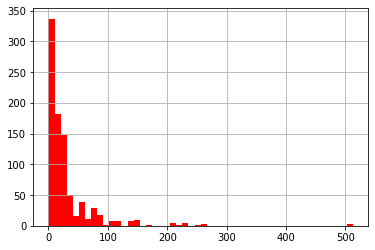

In [36]:
Train_data.Fare.hist(bins=50,color="red")
plt.show()

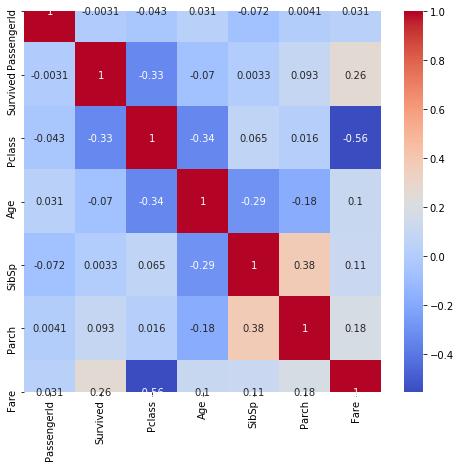

In [37]:
plt.figure(figsize=(8,7))
sns.heatmap(Train_data.corr(), annot=True,cmap="coolwarm")
plt.show()

In [38]:
(Train_data.groupby("Sex")["Survived"].mean()*100).round(2).astype(str)+"%"

Sex
female    74.76%
male      19.06%
Name: Survived, dtype: object

In [39]:
(Train_data.groupby("Embarked")["Survived"].mean()*100).round(2).astype(str)+"%"

Embarked
C    55.36%
Q    38.96%
S    33.91%
Name: Survived, dtype: object

In [40]:
Train_data["Embarked"].fillna("Embarked.mode()",inplace=True)

In [41]:
Test_data.Fare.value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [42]:
Test_data["Fare"].fillna(Test_data["Fare"].mean(),inplace=True)

In [43]:
Train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [44]:
Test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [45]:
Train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
Test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
Train_data.drop(["Name","Cabin","Ticket"], axis=1,inplace=True)

In [48]:
Test_data.drop(["Name","Cabin","Ticket"], axis=1,inplace=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
Train_data.Sex=pd.get_dummies(Train_data.Sex)
Train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [52]:
Train_data.Embarked=pd.get_dummies(Train_data.Embarked)

In [53]:
Test_data.Sex=pd.get_dummies(Test_data.Sex)

In [54]:
Test_data.Embarked=pd.get_dummies(Test_data.Embarked)

In [55]:
Train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
5,6,0,3,0,29.731603,0,0,8.4583,0
6,7,0,1,0,54.000000,0,0,51.8625,0
7,8,0,3,0,2.000000,3,1,21.0750,0
8,9,1,3,1,27.000000,0,2,11.1333,0
9,10,1,2,1,14.000000,1,0,30.0708,1


In [56]:
Test_data.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,0
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,0
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
5,897,3,0,14.0,0,0,9.2250,0
6,898,3,1,30.0,0,0,7.6292,0
7,899,2,0,26.0,1,1,29.0000,0
8,900,3,1,18.0,0,0,7.2292,1
9,901,3,0,21.0,2,0,24.1500,0


In [57]:
X=Train_data.drop("Survived", axis=1)
Y=Train_data["Survived"]

In [58]:
%%capture
!pip install seaborn

In [59]:
Train_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.003089,-0.042702,-0.046007,0.030955,-0.072042,0.004052,0.031211,-0.002568
Survived,-0.003089,1.000000,-0.334097,0.546015,-0.069634,0.003330,0.092819,0.264613,0.167164
Pclass,-0.042702,-0.334097,1.000000,-0.131245,-0.336822,0.065031,0.016440,-0.555558,-0.244689
Sex,-0.046007,0.546015,-0.131245,1.000000,-0.084051,0.129308,0.245750,0.179277,0.085228
Age,0.030955,-0.069634,-0.336822,-0.084051,1.000000,-0.290426,-0.179564,0.104997,0.031153
SibSp,-0.072042,0.003330,0.065031,0.129308,-0.290426,1.000000,0.379281,0.110072,-0.038038
Parch,0.004052,0.092819,0.016440,0.245750,-0.179564,0.379281,1.000000,0.183801,-0.000079
Fare,0.031211,0.264613,-0.555558,0.179277,0.104997,0.110072,0.183801,1.000000,0.291765
Embarked,-0.002568,0.167164,-0.244689,0.085228,0.031153,-0.038038,-0.000079,0.291765,1.000000


In [60]:
Train_data.drop("Survived",axis=1).corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.042702,-0.046007,0.030955,-0.072042,0.004052,0.031211,-0.002568
Pclass,-0.042702,1.000000,-0.131245,-0.336822,0.065031,0.016440,-0.555558,-0.244689
Sex,-0.046007,-0.131245,1.000000,-0.084051,0.129308,0.245750,0.179277,0.085228
Age,0.030955,-0.336822,-0.084051,1.000000,-0.290426,-0.179564,0.104997,0.031153
SibSp,-0.072042,0.065031,0.129308,-0.290426,1.000000,0.379281,0.110072,-0.038038
Parch,0.004052,0.016440,0.245750,-0.179564,0.379281,1.000000,0.183801,-0.000079
Fare,0.031211,-0.555558,0.179277,0.104997,0.110072,0.183801,1.000000,0.291765
Embarked,-0.002568,-0.244689,0.085228,0.031153,-0.038038,-0.000079,0.291765,1.000000


In [61]:
from scipy import stats 

In [62]:
pearson_coef,p_value=stats.pearsonr(Train_data["Sex"],Train_data["Survived"])
print("The Pearson_Corr is:", pearson_coef,"with a p_value of:",p_value)

The Pearson_Corr is: 0.5460152676435196 with a p_value of: 1.3199224204456943e-69


In [63]:
pearson_coef,p_value=stats.pearsonr(Train_data["Age"],Train_data["Survived"])
print("The Pearson_corr is:",pearson_coef,"with a P_value:",p_value)

The Pearson_corr is: -0.06963415264850928 with a P_value: 0.038787852503614356


In [64]:
hipearson_coef, p_value = stats.pearsonr(Train_data['Fare'], Train_data['Survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.06963415264850928  with a P-value of P =  1.3964928879806681e-15


In [65]:
pearson_coef, p_value = stats.pearsonr(Train_data["Parch"], Train_data['Survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.09281897247496279  with a P-value of P =  0.005832328334305685


In [66]:
pearson_coef, p_value = stats.pearsonr(Train_data['Embarked'], Train_data['Survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.1671636243397779  with a P-value of P =  6.044282669679652e-07


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
Rf=RandomForestClassifier(n_estimators=100,random_state=0)

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
Rcross=cross_val_score(Rf,X,Y,cv=10)
print("Rcross:",Rcross)
Rcross.mean()

Rcross: [0.65168539 0.79545455 0.73863636 0.85227273 0.90909091 0.85227273
 0.85227273 0.79545455 0.84090909 0.84090909]


0.8128958120531153

In [78]:
#outputing a prediction
Rf.fit(X,Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [79]:
test_yhat=Rf.predict(Test_data)

In [80]:
submission = pd.read_csv("gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
submission.Survived = test_yhat
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [82]:
submission.to_csv("pre_csv", index=False)